### Дормидонтов М.А. М22-ИВТ-4
#### Детектор: Dlib
#### Модель: OpenFace

In [36]:
!pip install deepface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import numpy as np
from keras.preprocessing import image
from deepface import DeepFace
import cv2
import dlib
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import matplotlib
from skimage import io
import mtcnn


In [39]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [40]:
img1_path = "/content/drive/MyDrive/foto/1.jpg"
img2_path = "/content/drive/MyDrive/foto/2.jpg"
img3_path = "/content/drive/MyDrive/foto/3.jpg"
img4_path = "/content/drive/MyDrive/foto/4.jpg"
img5_path = "/content/drive/MyDrive/foto/5.jpg"

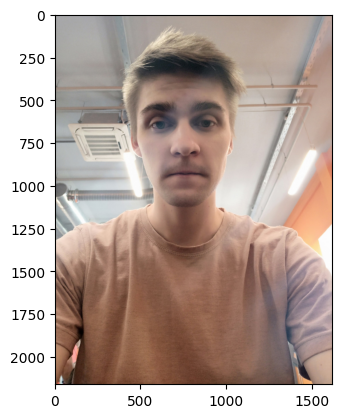

In [41]:
image = cv2.cvtColor(cv2.imread(cv2.os.path.join(img1_path)), cv2.COLOR_BGR2RGB)
imshow(image)

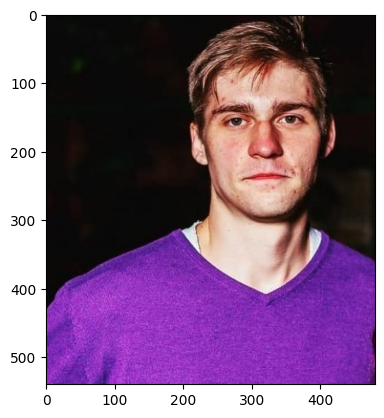

In [42]:
image = cv2.cvtColor(cv2.imread(cv2.os.path.join(img3_path)), cv2.COLOR_BGR2RGB)
imshow(image)

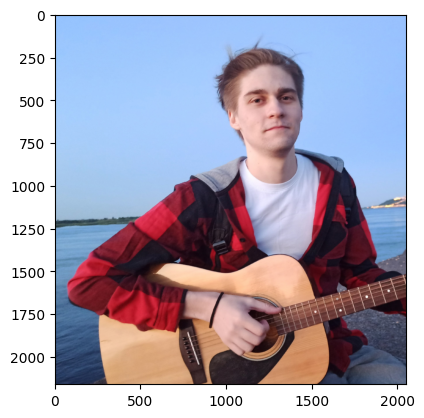

In [43]:
image = cv2.cvtColor(cv2.imread(cv2.os.path.join(img4_path)), cv2.COLOR_BGR2RGB)
imshow(image)

In [44]:
def verify(img1_path, img2_path):
  # Модель распознавания лиц
  model = "OpenFace"
  metric = "euclidean"
  backend = 'dlib'

  #обнаружение и выравнивание лиц
  detected_face_1 = DeepFace.detectFace(img1_path, detector_backend = backend)
  detected_face_2 = DeepFace.detectFace(img2_path, detector_backend = backend)
  result = DeepFace.verify(img1_path, img2_path, model_name = model, distance_metric = metric, detector_backend = backend)

  data = [img1_path, img2_path]
  plt.figure()
  for i in range(2):
      plt.subplot(1,2,i+1)
      plt.imshow(cv2.cvtColor(cv2.imread(data[i]), cv2.COLOR_BGR2RGB))
  plt.show()
  print("Same person: ", result["verified"])
  print("model:", result["model"])

In [45]:
def show_face(img1_path, img2_path):
  # Face Detector:
  backend = 'dlib'
  detected_face_1 = DeepFace.detectFace(img1_path, detector_backend = backend)
  detected_face_2 = DeepFace.detectFace(img2_path, detector_backend = backend)
  face = [detected_face_1, detected_face_2]
  plt.figure()
  for i in range(2):
      plt.subplot(1,2,i+1)
      plt.imshow(face[i])
  plt.show()

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


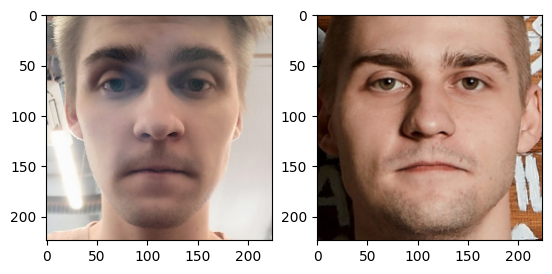

In [46]:
show_face(img1_path,img2_path)

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


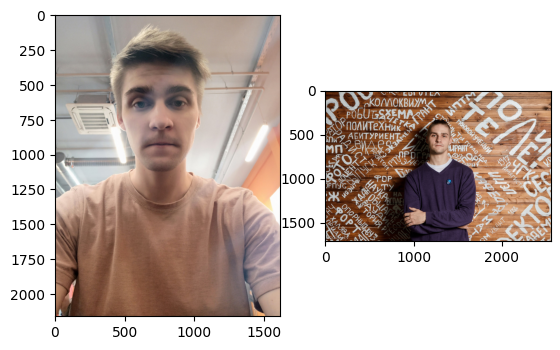

Same person:  False
model: OpenFace


In [47]:
verify(img1_path,img2_path)

#### Модель VGG-face показывает совпадение на моих фотографиях (True)

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


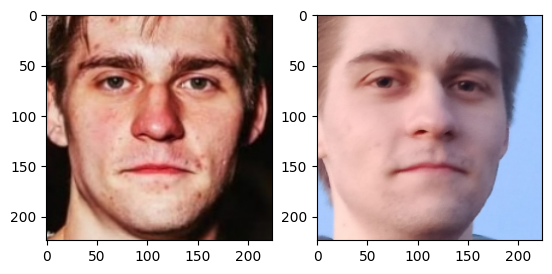

In [48]:
show_face(img3_path,img4_path)

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


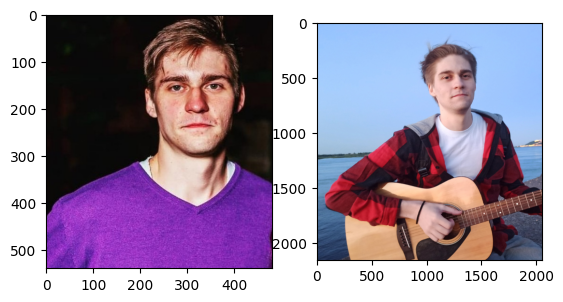

Same person:  False
model: OpenFace


In [49]:
verify(img3_path,img4_path)

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


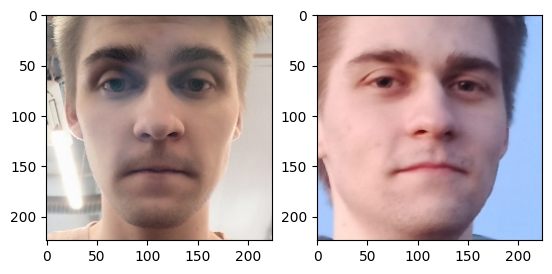

In [50]:
show_face(img1_path,img4_path)

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


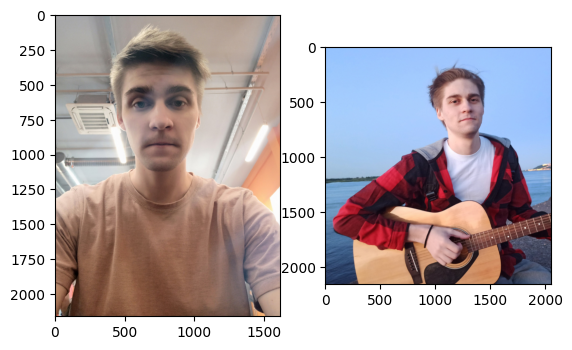

Same person:  False
model: OpenFace


In [51]:
verify(img1_path,img4_path)

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


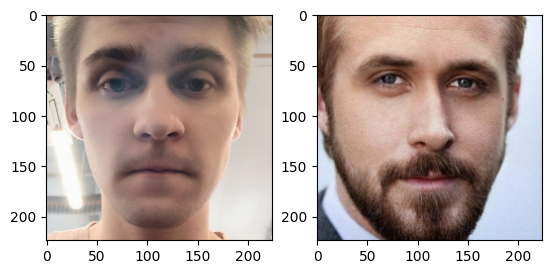

In [52]:
show_face(img1_path,img5_path)

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


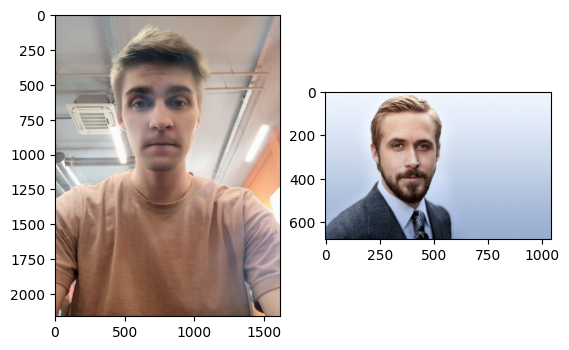

Same person:  False
model: OpenFace


In [53]:
verify(img1_path,img5_path)


⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


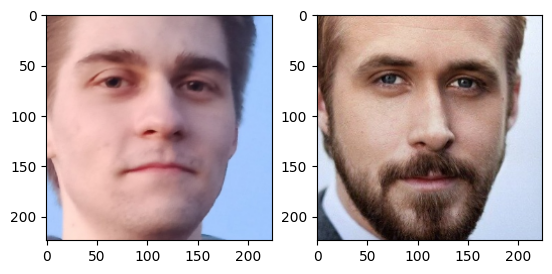

In [54]:
show_face(img4_path,img5_path)

⚠️ Function detectFace is deprecated! Use extract_faces instead of this.
⚠️ Function detectFace is deprecated! Use extract_faces instead of this.


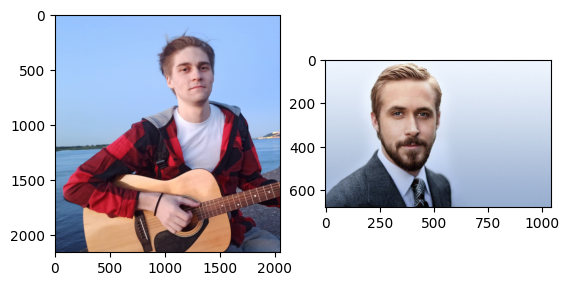

Same person:  False
model: OpenFace


In [55]:
verify(img4_path,img5_path)


Shape of image/array: (2160, 1617, 3)


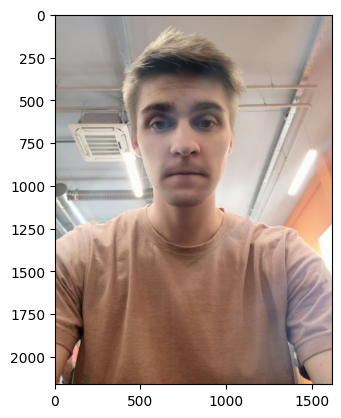

In [56]:
filename = "/content/drive/MyDrive/foto/1.jpg"
pixels = plt.imread(filename)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

1/1 [==============================] - 0s 165ms/step


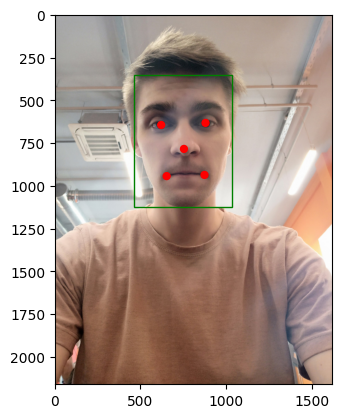

In [57]:
# нарисовать изображение с обнаруженными объектами
def draw_facebox(filename, result_list):
  data = plt.imread(filename)
  plt.imshow(data)
  ax = plt.gca()
  for result in result_list:
    x, y, width, height = result['box']
    rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
    ax.add_patch(rect)
  # цикл построения точек черт лица(глаз, носа, кголоков рта)
  for key, value in result['keypoints'].items():
    # создать и нарисовать точку
    dot = plt.Circle(value, radius=20, color='red')
    ax.add_patch(dot)
  plt.show()

detector = mtcnn.MTCNN()
faces = detector.detect_faces(pixels)
draw_facebox(filename, faces)

Shape of image/array: (540, 480, 3)


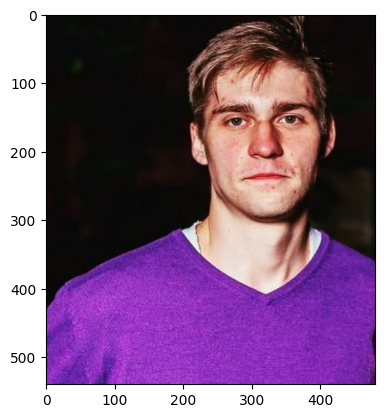

In [58]:
filename = "/content/drive/MyDrive/foto/3.jpg"
pixels = plt.imread(filename)
print("Shape of image/array:",pixels.shape)
imgplot = plt.imshow(pixels)
plt.show()

1/1 [==============================] - 0s 266ms/step


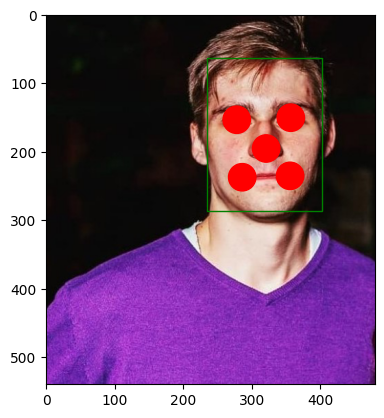

In [59]:
# нарисовать изображение с обнаруженными объектами
def draw_facebox(filename, result_list):
  data = plt.imread(filename)
  plt.imshow(data)
  ax = plt.gca()
  for result in result_list:
    x, y, width, height = result['box']
    rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
    ax.add_patch(rect)
  # цикл построения точек черт лица(глаз, носа, кголоков рта)
  for key, value in result['keypoints'].items():
    # создать и нарисовать точку
    dot = plt.Circle(value, radius=20, color='red')
    ax.add_patch(dot)
  plt.show()

detector = mtcnn.MTCNN()
faces = detector.detect_faces(pixels)
draw_facebox(filename, faces)